In [1]:
# Testing Pacman
import postprocess as pp
import plots as plots

postproc


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Council tax requested vs. available cash
# (at the time)
1400/3000
# 1400/4000



0.4666666666666667

In [4]:
# 50/1400
50/3000

0.016666666666666666

### Analytical

In [5]:
x = sp.symbols('x')
u = sp.Function('u')
k, t, L = sp.symbols('k t L')

eq = sp.Eq( u(x).diff(x, 2) - k*u(x), 0)
solution = sp.dsolve(eq)
print(solution)



Eq(u(x), C1*exp(-sqrt(k)*x) + C2*exp(sqrt(k)*x))


In [6]:
solution

Eq(u(x), C1*exp(-sqrt(k)*x) + C2*exp(sqrt(k)*x))

In [7]:
boundary_conditions = {(u(x).diff(x)).subs({x: -L/2}): t, (u(x).diff(x)).subs({x:L/2}): t}
equilibrium = sp.dsolve(eq, ics= boundary_conditions)

In [8]:
equilibrium.rhs

(t*exp(2*L*sqrt(k))/(sqrt(k)*exp(5*L*sqrt(k)/2) - sqrt(k)*exp(L*sqrt(k)/2)) - t*exp(L*sqrt(k))/(sqrt(k)*exp(5*L*sqrt(k)/2) - sqrt(k)*exp(L*sqrt(k)/2)))*exp(sqrt(k)*x) + (-t*exp(9*L*sqrt(k)/2)/(sqrt(k)*exp(5*L*sqrt(k)) - 2*sqrt(k)*exp(3*L*sqrt(k)) + sqrt(k)*exp(L*sqrt(k))) + t*exp(7*L*sqrt(k)/2)/(sqrt(k)*exp(5*L*sqrt(k)) - 2*sqrt(k)*exp(3*L*sqrt(k)) + sqrt(k)*exp(L*sqrt(k))) + t*exp(5*L*sqrt(k)/2)/(sqrt(k)*exp(5*L*sqrt(k)) - 2*sqrt(k)*exp(3*L*sqrt(k)) + sqrt(k)*exp(L*sqrt(k))) - t*exp(3*L*sqrt(k)/2)/(sqrt(k)*exp(5*L*sqrt(k)) - 2*sqrt(k)*exp(3*L*sqrt(k)) + sqrt(k)*exp(L*sqrt(k))))*exp(-sqrt(k)*x)

In [9]:
equilibrium = sp.dsolve(eq, ics= { u(x).diff(x).subs(x, 0): t,
                      u(x).diff(x).subs(x, L): t})

In [10]:
equilibrium

Eq(u(x), -t*exp(L*sqrt(k))*exp(-sqrt(k)*x)/(sqrt(k)*exp(L*sqrt(k)) + sqrt(k)) + t*exp(sqrt(k)*x)/(sqrt(k)*exp(L*sqrt(k)) + sqrt(k)))

In [11]:
matpar = {k: (.1)**(-1), L: 1, t: 1}

In [12]:
uprime = equilibrium.rhs.diff(x).simplify()

In [13]:
uprime.subs(x, L/2)

2*t*exp(L*sqrt(k)/2)/(exp(L*sqrt(k)) + 1)

In [14]:
_eq

NameError: name '_eq' is not defined

In [ ]:
_eq.diff(x)

NameError: name '_eq' is not defined

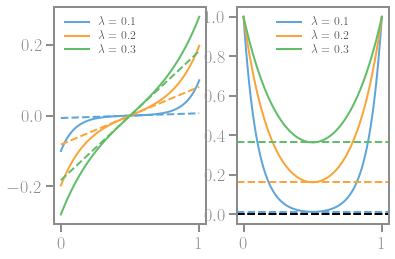

In [15]:
fig, ax = plt.subplots(1, 2)
for c, lmbda in enumerate([.1, .2, .3]):
    matpar = {k: (lmbda)**(-2), L: 1, t: 1}
    _eq = equilibrium.rhs.subs(matpar)
    eps = _eq.diff(x)
    eps_0 = eps.subs(x, L/2).subs(matpar)

    x_coordinates = np.linspace(0, float(L.subs(matpar)), 100)

    _f = sp.lambdify(x, _eq, 'numpy')
    _e = sp.lambdify(x, eps, 'numpy')

    ax[0].plot(x_coordinates, _f(x_coordinates), c='C'+str(c), label=f'$\lambda = {lmbda}$')
    ax[0].plot(x_coordinates, eps_0*(x_coordinates-1/2),  c='C'+str(c), ls = '--')   
    ax[1].plot(x_coordinates, _e(x_coordinates),  c='C'+str(c), label=f'$\lambda = {lmbda}$')
    ax[1].axhline(0, color='black', linestyle='--')
    ax[1].axhline(eps_0,  c='C'+str(c), linestyle='--')
[a.legend() for a in ax]

In [16]:
matpar

{k: 11.111111111111112, L: 1, t: 1}

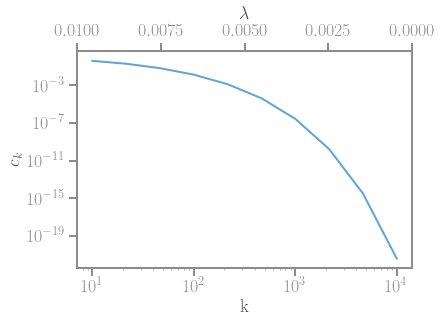

In [64]:
_matpar = {key: value for key, value in matpar.items() if key != k}
# _matpar
fig, ax = plt.subplots(1, 1)

f = (uprime/t).subs(x, L/2).subs(_matpar)
_f = sp.lambdify(k, f, 'numpy')
k_values = np.logspace(1, 4, 10)
ax.plot(k_values, _f(k_values), label=f'$\lambda = {lmbda}$')
ax.loglog()
plt.xlabel('k')
plt.ylabel('$c_k$')
ax2 = ax.twiny()
ax2.set_xlabel('$\lambda$')
top_ticks = np.linspace(k_values[-1]**(-2), k_values[0]**(-2), 5)

# top_ticks = np.arange(0, 11, 2)  # Customize the tick positions as needed
# top_ticks = np.arange(10, -1, -2)  # Customize the tick positions as needed

ax2.set_xticks(top_ticks)
ax2.set_xlim(k_values[-1]**(-2), k_values[0]**(-2))
ax2.invert_xaxis()


In [61]:
np.linspace(k_values[-1]**(-2), k_values[0]**(-2), 5)

array([1.0000000e-08, 2.5000075e-03, 5.0000050e-03, 7.5000025e-03,
       1.0000000e-02])

In [28]:
(uprime/t).subs(x, L/2)

2*exp(L*sqrt(k)/2)/(exp(L*sqrt(k)) + 1)

In [53]:
np.arange(10, -1, -2) 

array([10,  8,  6,  4,  2,  0])

In [110]:
eps_0

2*exp(L*sqrt(k)/2)/(exp(L*sqrt(k)) + 1)

### Extended phase space

In [66]:
experiment = '../../test/output/multifissa'
params, data, signature = pp.load_data(experiment)


no sig file found


In [67]:
data

,it,AM_F_alpha_H1,AM_Fnorm,NE_Fnorm,load,fracture_energy,elastic_energy,total_energy,solver_data,rate_12_norm,rate_12_norm_unscaled
0,0,0.0,0.113059,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
1,1,0.0,0.112993,4.530080e-17,0.040837,0.000000,0.000202,0.000202,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
2,2,0.0,0.112794,3.556779e-17,0.081673,0.000000,0.000810,0.000810,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
3,3,0.0,0.112462,5.470746e-17,0.122510,0.000000,0.001822,0.001822,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
4,4,0.0,0.111996,6.393277e-17,0.163347,0.000000,0.003239,0.003239,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
5,5,0.0,0.111395,7.177998e-17,0.204184,0.000000,0.005061,0.005061,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
6,6,0.0,0.110657,1.033367e-16,0.245020,0.000000,0.007288,0.007288,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
7,7,0.0,0.109782,1.209542e-16,0.285857,0.000000,0.009920,0.009920,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
8,8,0.0,0.108768,1.459578e-16,0.326694,0.000000,0.012956,0.012956,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
9,9,0.0,0.107611,1.495607e-16,0.367531,0.000000,0.016398,0.016398,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000


$$
s:= t + \int_0^t ||\dot \alpha||_{1, 2} dx
$$

In [68]:
data.get("rate_12_norm")

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.114289
26    0.001249
27    0.001282
28    0.001345
29    0.001449
30    0.159416
31    0.001219
32    0.001259
33    0.001322
34    0.001414
35    0.001552
36    0.001778
37    0.002216
38    0.003798
39    0.017669
40    0.001316
41    0.001318
42    0.001365
43    0.001440
44    0.001638
45    0.002333
46    0.002720
47    0.003230
48    0.004369
49    0.060853
Name: rate_12_norm, dtype: float64

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
params.get("geometry").get("Ly")

0.1

In [70]:
sell = []
_dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
for i, t in enumerate(data.get("load")):
    sell.append(np.trapz(data.get("rate_12_norm")[0:i], data.get("load")[0:i])/_dt)

s0 = []
_dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
for i, t in enumerate(data.get("load")):
    s0.append(np.trapz(data.get("rate_12_norm_unscaled")[0:i], data.get("load")[0:i])/_dt)
    
# s = data.get("load") + s0

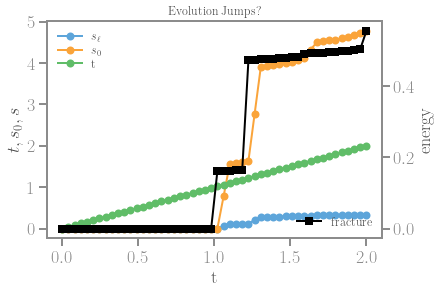

In [77]:
plt.title("Evolution Jumps?")
# plt.plot(data.get("load"), s, marker = 'o', label='s')
plt.plot(data.get("load"), sell, marker = 'o', label='$s_\ell$')
plt.plot(data.get("load"), s0, marker = 'o', label='$s_0$')
plt.plot(data.get("load"), data.get("load"), marker = 'o', label='t')
plt.ylabel('$t, s_0, s$')
plt.xlabel('t')
plt.legend()
plt.twinx()
plt.plot(data.get("load"), data.get("fracture_energy")/params.get("geometry").get("Ly"),
    marker = 's', c='k', label='fracture')
plt.ylabel('energy')
plt.legend(loc=4)
plt.savefig('jumps_evo_multifiss.png')

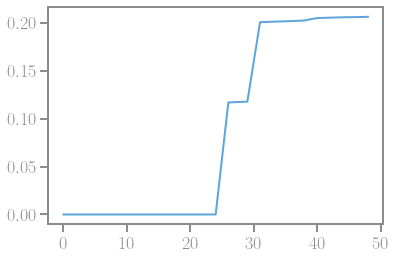

In [64]:
plt.plot(data.get("load"), sell, marker = 'o', label='$s_\ell$')
plt.twinx()
plt.plot(np.diff(np.array(sell)), label="")
plt.xlabel('t')
